## Dynamic programming
### Sequence problem
$$
\max_{\{c_t\}} 
\sum_{t=0}^\infty
\beta^t u(x_t, c_t)
$$
s.t.
$$
x_{t+1} = F(x_t, c_t)
$$
$\beta<1$
> alternatively, beta-delta discounting,
> $\beta \delta^t$ if $t>0$, $1$ if t=0

$$
V_0(x_0) = \max_{\{c_t\}} 
\sum_{t=0}^\infty
\beta^t u(x_t, c_t)
$$

### Recursive formulation
$$
V(x_t) = \max _c
u(x_t, c) + \beta V(x_{t+1})
\tag{Bellman}
$$
1. functional equation, for all values of x
2. under "some conditions" $V$ is unique
3. in this case $V = V_0$

### "Algorithms"
1. guess and verify
2. value function iteration
3. policy function iteration

## Example, cake eating problem
### SP
$$
\max_{\{c_t\}} \sum_{t=0}^\infty
\beta^t \ln c_t
$$
s.t.
$$
x_{t+1} = R(x_t-c_t)
$$
with $R\ge 1$

### RP
$$
V(x_t) = \max_c\, \ln c
+ \beta V[R(x_t-c)]
$$

### Guess and verify?
$$
V(x) = a+b \ln x
$$
find $a$ and $b$ s.t. Bellman eq holds

### VFI
1. guess $V_0(x)$ (e.g. = $V_0(x) = v$)
2. plug in to RHS
3. solve for $c_0$, given $V_0$
4. get a new candidate $V_1$ from the LHS
5. repeat until convergence

#### Variants:
1. parametric $V_i$
	1. what if $V_{i+1}$ not in same family?
		1. guess and verify
		2. approximate
2. non-parametric approach: discretize,
	1. $V(x) = \{v_1,v_2, ...\}$ for $x_1, x_2, ...$
		1. bounded, make sure ok for your app
		2. granularity potentially important
		3. super memory and CPU intensive
			1. especially if $x$ is multidim

## PFI
1. pick $c_0(x)$, like $c(x) = c_0$ or $c(x) = c\cdot x$
2. solve for inf-horizon value $V_0$
3. find optimal $c_1$ given $V_0$
4. repeat


$$
\max _c
\ln c
+ \beta [a+b\ln R(x-c)]
= 
\max _c
\ln c
+ \beta [a+b\ln R + b\ln(x-c)]
$$
FOC
$$
\frac 1c = \beta b\frac {1}{x-c}
$$
$$
c = \frac{x}{1+\beta b}
$$
so that
$$
\ln c = \ln x - \ln(1+\beta b)
$$
and
$$
\ln(x-c) = \ln x +\ln\frac{\beta b}{1+\beta b}
$$

In [2]:
struct LogValueFunction
    a::Real
    b::Real
end
struct CakeEatingProblem
    β::Real
    R::Real
end

In [3]:
ln = log
function iterate_value_function(problem::CakeEatingProblem, guess::LogValueFunction)::LogValueFunction
    a, b = guess.a, guess.b
    β, R = problem.β, problem.R
    new_a = -ln(1 + β*b) + β*(a + b*(ln(R) + ln(β*b) - ln(1 + β*b)))
    new_b = 1 + β*b
    return LogValueFunction(new_a, new_b)
end

iterate_value_function (generic function with 1 method)

In [4]:
# v = iterate_value_function(params, v)

In [17]:
using Plots
function plot_value_function(v::LogValueFunction)
    x = collect(0:0.01:1)
    y = v.a .+ v.b * log.(x)
    plot(x, y)
end
function plot_value_function(vs::Vector{LogValueFunction})
    x = collect(0:0.01:1)
    K = length(vs)
    Y = zeros(length(x), K)
    for i = 1:K
        Y[:, i] .= vs[i].a .+ vs[i].b * log.(x)
    end
    plot(x, Y)
end

plot_value_function (generic function with 2 methods)

In [16]:
y = 1
Y = 2
y

1

In [21]:
cake = CakeEatingProblem(0.95, 1.02)

CakeEatingProblem(0.95, 1.02)

In [31]:
function distance(x::LogValueFunction, y::LogValueFunction)::Real
    return sqrt((x.a - y.a)^2 + (x.b - y.b)^2)
end

distance (generic function with 1 method)

LogValueFunction(-1.3321834102593304, 1.95)
LogValueFunction(-3.0767353151927783, 2.8525)
LogValueFunction(-5.031394105308125, 3.709875)
LogValueFunction(-7.099818853621886, 4.524381249999999)
LogValueFunction(-9.226130212792514, 5.298162187499999)
LogValueFunction(-11.374563880053419, 6.033254078124999)
LogValueFunction(-13.520891799009446, 6.731591374218749)
LogValueFunction(-15.648129578014604, 7.395011805507812)
LogValueFunction(-17.744133240149008, 8.02526121523242)
LogValueFunction(-19.800141762630503, 8.623998154470799)
LogValueFunction(-21.809838687733922, 9.192798246747259)
LogValueFunction(-23.76871926294392, 9.733158334409895)
LogValueFunction(-25.673647617608513, 10.2465004176894)
LogValueFunction(-27.522537536259847, 10.73417539680493)
LogValueFunction(-29.31411663399149, 11.197466626964683)
LogValueFunction(-31.047748576179167, 11.63759329561645)
LogValueFunction(-32.72329676755525, 12.055713630835626)
LogValueFunction(-34.34101834202766, 12.452927949293844)
LogValueFunct

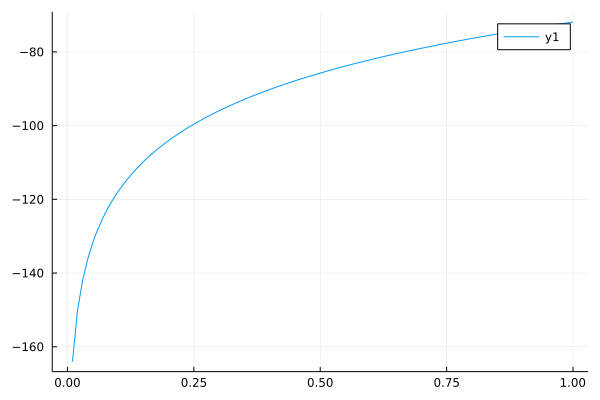

In [35]:
guess = LogValueFunction(0, 1)
tolerance = 1e-6
# guesses = Vector{LogValueFunction}
for t=1:1000
    new_guess = iterate_value_function(cake, guess)
    # if tolerance is met, break out of loop
    distance(guess, new_guess) < tolerance && break
    guess = new_guess
    println(guess)
    #append!(guesses, guess)
end
#typof(guesses)
plot_value_function(guess)

In [15]:
length(x)

101

In [9]:
x = collect(0:0.01:1)

101-element Vector{Float64}:
 0.0
 0.01
 0.02
 0.03
 0.04
 0.05
 0.06
 0.07
 0.08
 0.09
 0.1
 0.11
 0.12
 ⋮
 0.89
 0.9
 0.91
 0.92
 0.93
 0.94
 0.95
 0.96
 0.97
 0.98
 0.99
 1.0

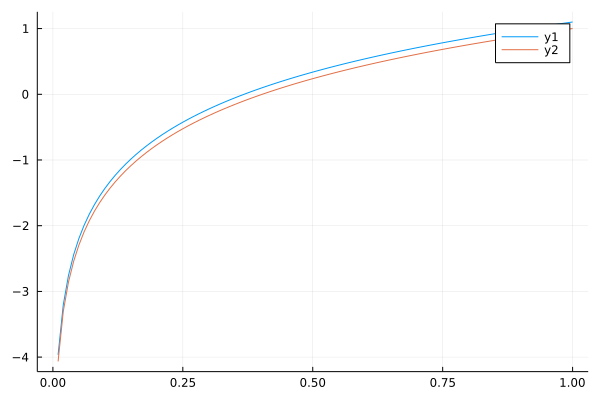

In [20]:
plot_value_function([LogValueFunction(1.1, 1.1), LogValueFunction(1, 1.1)])

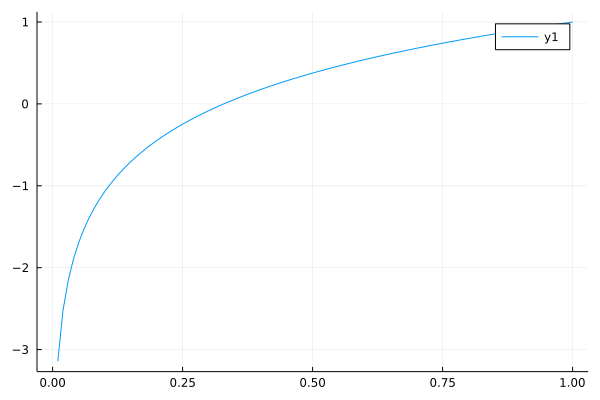

In [12]:
plot_value_function(LogValueFunction(1, 0.9))